# Imports

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from tqdm import tqdm

# Load Data

In [ ]:
ticker_details = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
ticker_list = ticker_details['Symbol'].to_list()

ticker_list[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD']

In [ ]:
start = '01-01-2020'

tickers_df = pd.DataFrame()

for ticker in tqdm(ticker_list[:50], desc=' > Tickers: '):
  try:
    tickers_df[ticker] = pdr.get_data_yahoo(ticker, start)['Adj Close']
  except:
    print(f' > Skipping {ticker}')

 > Tickers: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


In [ ]:
tickers_df.head(10)

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,AAP,AES,AFL,A,AIG,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE,AAL,AEP,AXP,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,APA,AAPL,AMAT,APTV,ANET
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,168.199295,46.011986,84.001175,80.137352,168.809998,203.776093,57.986031,43.546410,334.429993,163.176071,155.755646,18.900261,50.655121,84.799675,48.429932,221.426224,87.639999,67.785583,70.827240,151.911194,283.679993,122.522972,50.637589,107.564346,1368.680054,1367.369995,41.938816,1898.010010,9.779819,49.099998,72.200722,28.982893,87.362556,122.334518,219.909485,116.672516,161.967590,82.331718,99.423332,226.630829,53.576996,116.062126,259.589996,293.308044,205.257217,24.719690,73.988480,60.938877,96.065666,51.180000
2020-01-03,166.750916,45.607441,82.977104,79.376686,166.820007,203.436722,58.005798,43.461414,331.809998,162.831177,155.765396,18.683233,50.303814,83.438148,48.055668,216.502243,87.239998,66.542633,69.812767,152.776642,280.440002,121.008400,50.798103,107.573898,1361.520020,1360.660034,42.262413,1874.969971,9.651017,48.599998,72.229195,27.548195,87.269089,121.119431,220.015335,117.429634,159.948151,81.296272,99.561417,225.092255,53.017826,114.019012,256.970001,289.418304,204.451141,25.041361,73.269157,59.968952,93.861275,50.212502
2020-01-06,166.909790,45.896404,83.411842,80.003113,179.039993,202.108246,59.063690,43.121433,333.709991,163.051498,153.205490,18.900261,50.161385,83.684799,48.093090,216.406433,87.550003,66.224434,69.734741,153.147568,285.880005,120.783661,50.750893,107.888512,1397.810059,1394.209961,42.432716,1902.880005,9.586615,48.389999,72.295654,27.219410,87.558861,120.594521,219.957596,117.206390,160.474548,82.486534,99.669914,226.819595,52.743149,112.679428,254.589996,292.898560,205.040970,24.992622,73.852982,58.675713,92.115715,50.715000
2020-01-07,166.236969,45.588173,82.948128,79.546707,180.350006,197.744751,59.656895,42.602009,333.390015,161.077942,151.388123,18.966314,49.686642,83.941322,47.821747,217.326096,90.199997,65.806808,70.651657,148.135529,283.059998,119.337502,50.798103,106.963707,1395.109985,1393.339966,42.211311,1906.859985,9.503812,48.250000,72.561485,27.119778,87.577568,119.962677,215.270645,116.478394,158.541245,81.896255,100.241982,224.686371,53.027645,115.242966,256.670013,292.011444,203.300903,31.689161,73.505646,60.370640,90.958664,51.212502
2020-01-08,168.788025,45.520748,83.286263,80.110497,178.690002,198.132629,59.202103,42.129807,337.869995,162.591660,149.648926,18.928572,49.838566,84.770065,48.383148,218.504410,91.400002,66.125000,69.432343,150.104202,286.000000,119.845634,50.911404,107.259262,1405.040039,1404.319946,42.645607,1891.969971,9.540612,47.830002,72.438065,27.737495,87.315826,122.033173,217.137741,116.954018,159.967285,82.689758,100.468857,224.856262,53.155174,116.283798,257.730011,299.751892,204.136520,31.903606,74.688072,60.331455,92.853836,51.744999
2020-01-09,169.320633,45.318478,83.508469,80.727966,183.600006,199.897415,58.668217,41.695377,340.450012,164.028717,149.365570,19.117290,49.848057,86.102005,48.916470,223.687042,93.190002,65.995735,70.954041,149.571609,296.540009,120.060593,51.487362,108.479637,1419.790039,1419.829956,43.062862,1901.050049,9.568213,48.970001,72.713387,27.847092,87.755157,124.239769,217.955780,118.545883,161.623062,83.860680,99.975677,225.526428,53.341553,116.283798,261.429993,298.708771,205.561996,31.776888,76.274513,60.713543,91.497292,51.700001
2020-01-10,168.638504,45.867500,82.465088,79.698845,189.059998,201.361618,58.282631,41.506493,339.809998,163.913757,145.594070,19.041800,49.439774,86.417717,48.682560,222.250076,93.529999,65.518440,70.329750,150.807953,293.329987,120.607788,51.997242,108.165001,1428.959961,1429.729980,42.764820,1883.160034,9.614214,48.169998,73.112129,27.219410,88.185135,123.724564,222.122986,118.963272,161.900620,84.228416,99.383858,224.894012,53.130642,114.269592,260.799988,300.005341,204.539581,31.562447,76.446953,60.2

# Clustering using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
x = tickers_df.to_numpy()
x.shape

x_t = x.transpose()
x_t.shape

(50, 523)

In [ ]:
# Convert dataframe into matrix
x = tickers_df.to_numpy()
print(f' > X shape: {x.shape}')

# Standard Normalization
x = StandardScaler().fit_transform(x)

# PCA into N close prices
N_COMPONENTS = 5

x_t = x.transpose()
print(f' > X transpose shape: {x.shape}')

pca = PCA(n_components=N_COMPONENTS)

principalComponents = pca.fit_transform(x_t)
print(f' > Component shape: {x.shape}')

 > X shape: (523, 50)
 > X transpose shape: (523, 50)
 > Component shape: (523, 50)


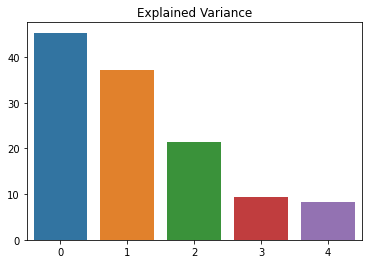

In [ ]:
sn.barplot(x=np.arange(0, N_COMPONENTS), y=pca.explained_variance_)
plt.title('Explained Variance')
plt.show()

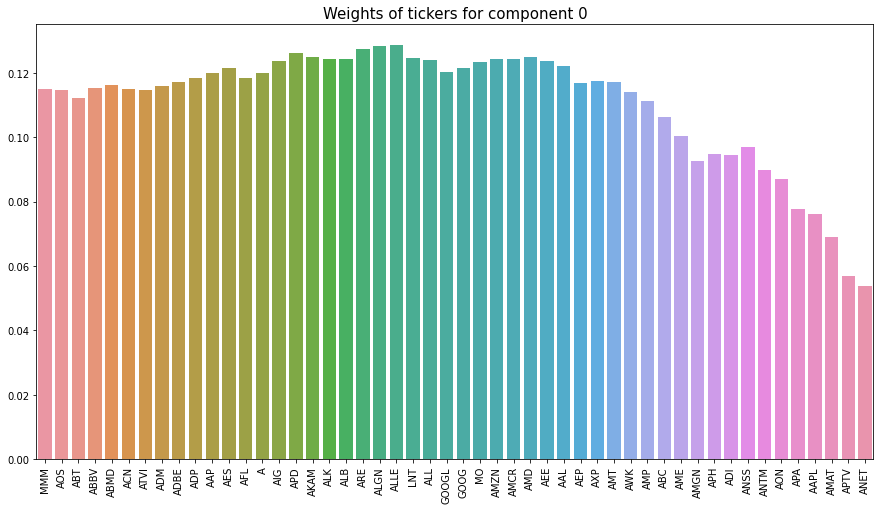

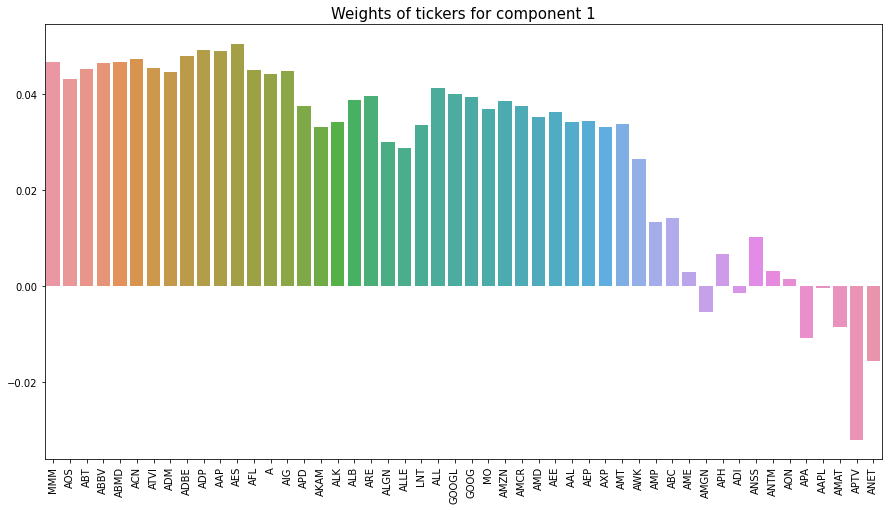

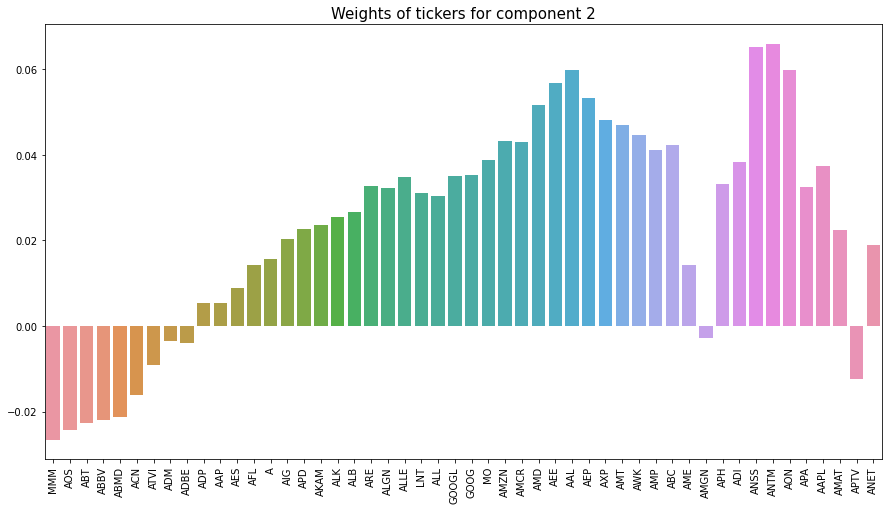

In [ ]:
weights = pca.components_

VIEW_COMPONENTS = 3

for i in range(VIEW_COMPONENTS):
  plt.figure(figsize=(15,8))
  sn.barplot(x=np.arange(0, len(ticker_list[:50])), y=weights[i][:50])
  plt.title(f'Weights of tickers for component {i}', fontsize=15)
  plt.xticks(np.arange(0, len(ticker_list[:50])), ticker_list[:50], rotation=90)
  plt.show()

In [ ]:
component_0_df = pd.DataFrame({'ticker': ticker_list[:50],
                               'weights': weights[0][:50]})
component_0_df = component_0_df.sort_values(by='weights')

In [ ]:
component_0_df.head(10)

,ticker,weights
49,ANET,0.053874
48,APTV,0.056991
47,AMAT,0.068885
46,AAPL,0.076061
45,APA,0.077620
44,AON,0.086996
43,ANTM,0.089813
39,AMGN,0.092516
41,ADI,0.094641
40,APH,0.094795


In [ ]:
component_0_df.tail(10)

,ticker,weights
17,ALK,0.124240
27,AMZN,0.124260
28,AMCR,0.124455
22,LNT,0.124593
29,AMD,0.125039
16,AKAM,0.125043
15,APD,0.126161
19,ARE,0.127554
20,ALGN,0.128260
21,ALLE,0.128612


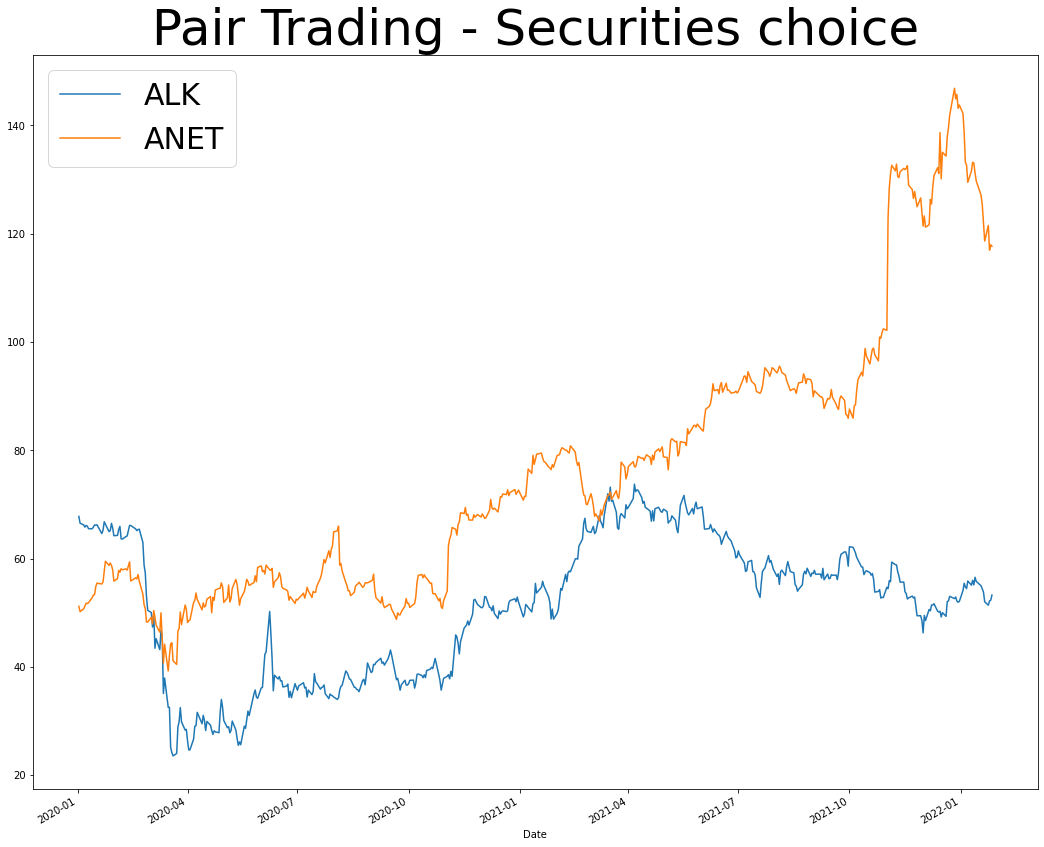

In [ ]:
tickers_df[['ALK', 'ANET']].plot(figsize=(18,15))
plt.title('Pair Trading - Securities choice', fontsize=50)
plt.legend(fontsize=30)
plt.show()

In [ ]:
component_2_df = pd.DataFrame({'ticker': ticker_list[:50],
                               'weights': weights[2][:50]})
component_2_df = component_2_df.sort_values(by='weights')

In [ ]:
component_2_df.head(10)

,ticker,weights
0,MMM,-0.026544
1,AOS,-0.024250
2,ABT,-0.022666
3,ABBV,-0.022093
4,ABMD,-0.021297
5,ACN,-0.016169
48,APTV,-0.012287
6,ATVI,-0.009188
8,ADBE,-0.003905
7,ADM,-0.003521


In [ ]:
component_2_df.tail(10)

,ticker,weights
35,AWK,0.044698
34,AMT,0.046857
33,AXP,0.048207
29,AMD,0.051719
32,AEP,0.053149
30,AEE,0.056810
44,AON,0.059734
31,AAL,0.059782
42,ANSS,0.065176
43,ANTM,0.065827


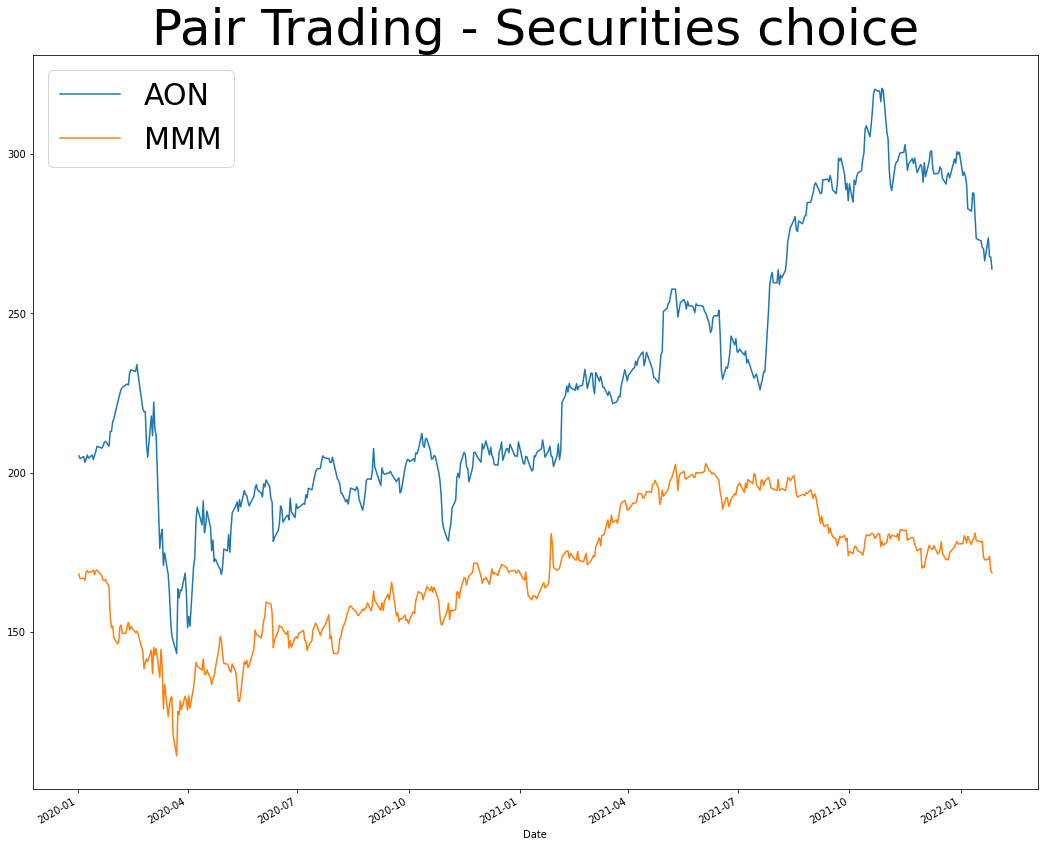

In [ ]:
tickers_df[['AON', 'MMM']].plot(figsize=(18,15))
plt.title('Pair Trading - Securities choice', fontsize=50)
plt.legend(fontsize=30)
plt.show()